In [111]:
# 1.
## 1.1

In [112]:
# import libraries
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from scipy.stats import skew, kurtosis

# Set the current working directory
os.chdir(sys.path[0])

In [113]:
# define sample sizes
sizes = [100, 1000, 10000]
#kurtosis_values = []

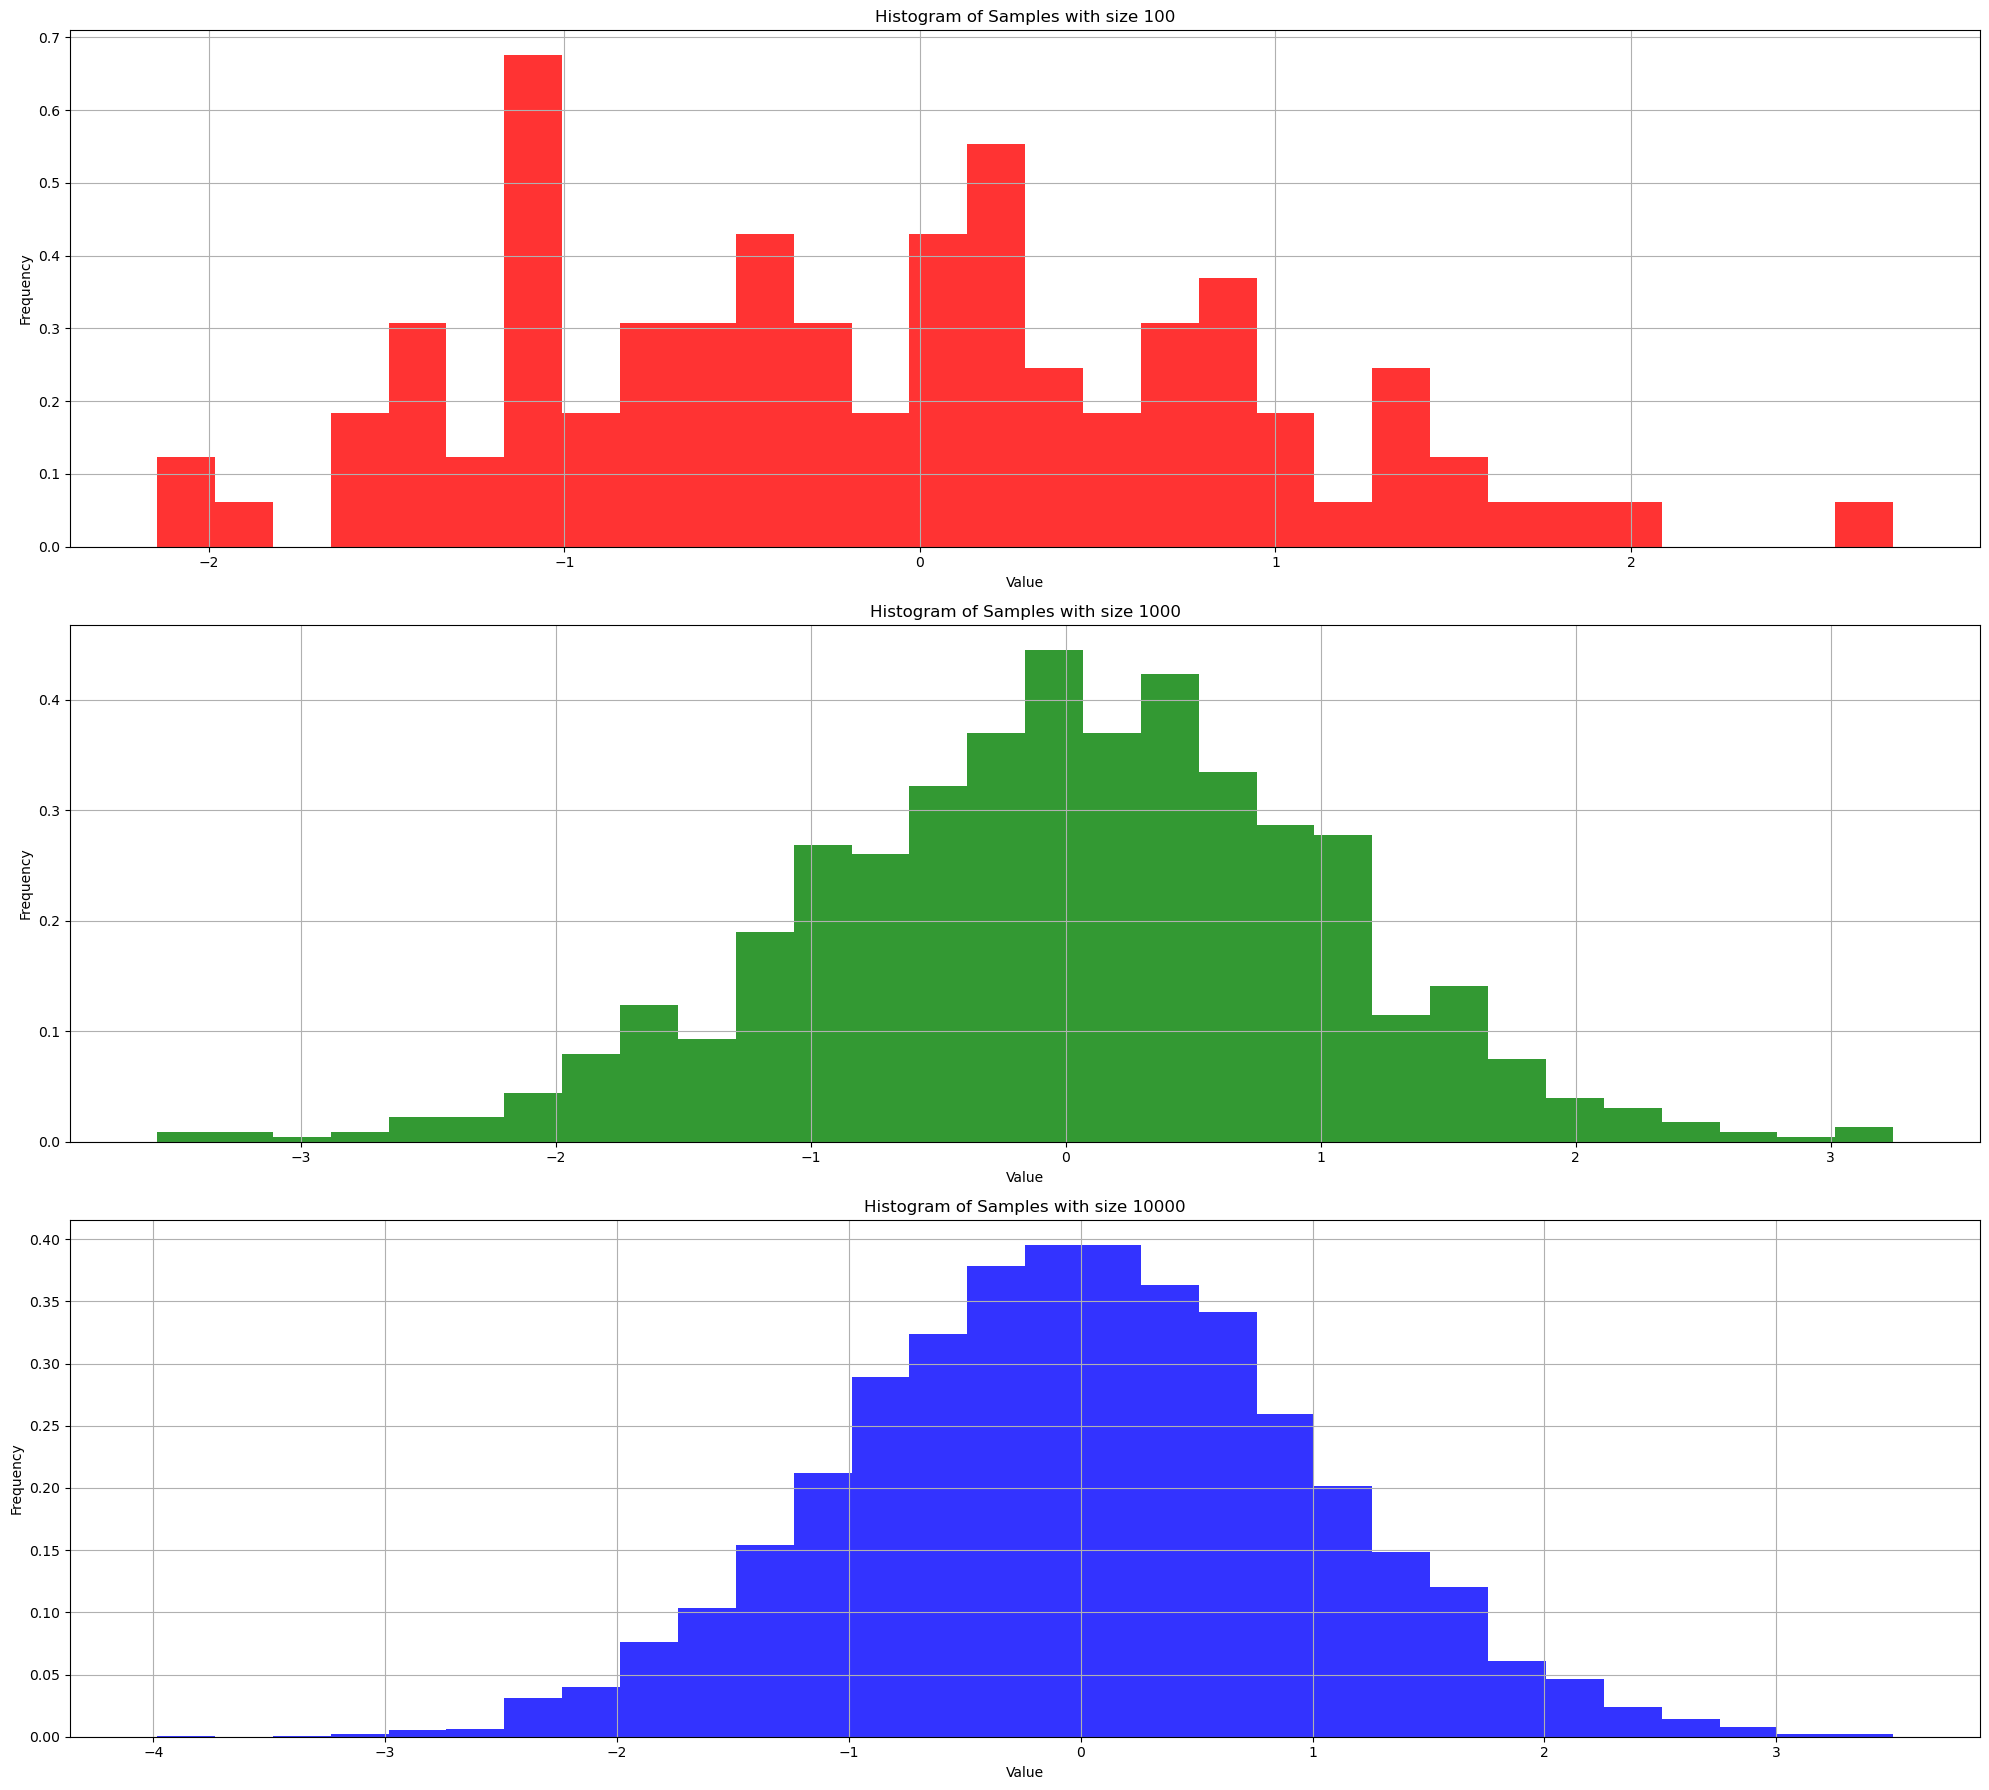

Sample size: 100, Kurtosis: -0.33766638750736755
Sample size: 1000, Kurtosis: 0.3356225774933672
Sample size: 10000, Kurtosis: -0.05024741281744616


In [114]:
# create a figure for histograms
plt.figure(figsize = (20,18))
# sample size 100
samples_100 = np.random.normal(0, 1, 100)
kurtosis_100 = stats.kurtosis(samples_100)

# sample size 1000
samples_1000 = np.random.normal(0, 1, 1000)
kurtosis_1000 = stats.kurtosis(samples_1000)

# sample size 10000
samples_10000 = np.random.normal(0, 1, 10000)
kurtosis_10000 = stats.kurtosis(samples_10000)

# plot histogram for sample size 100
plt.subplot(3, 1, 1)
plt.hist(samples_100, bins=30, density=True, alpha=0.8, color='r')
plt.title(f'Histogram of Samples with size 100')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

# plot histogram for sample size 1000
plt.subplot(3, 1, 2)
plt.hist(samples_1000, bins=30, density=True, alpha=0.8, color='g')
plt.title(f'Histogram of Samples with size 1000')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

# plot histogram for sample size 10000
plt.subplot(3, 1, 3)
plt.hist(samples_10000, bins=30, density=True, alpha=0.8, color='b')
plt.title(f'Histogram of Samples with size 10000')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

# show layout and plot
plt.tight_layout()
plt.show()

# print Kurtosis Values
print(f"Sample size: 100, Kurtosis: {kurtosis_100}")
print(f"Sample size: 1000, Kurtosis: {kurtosis_1000}")
print(f"Sample size: 10000, Kurtosis: {kurtosis_10000}")

In [41]:
## 1.2

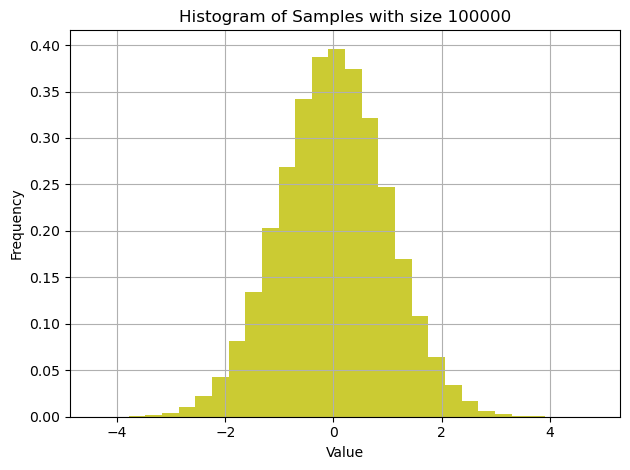

Sample size: 100000, Kurtosis: 0.009374276827441186


In [115]:
# sample size 100000
samples_100000 = np.random.normal(0, 1, 100000)
kurtosis_100000 = stats.kurtosis(samples_100000)

# plot histogram for sample size 100
#plt.figure(figsize = (8, 6)
plt.hist(samples_100000, bins=30, density=True, alpha=0.8, color='y')
plt.title(f'Histogram of Samples with size 100000')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

# show layout and plot
plt.tight_layout()
plt.show()

# print Kurtosis Values
print(f"Sample size: 100000, Kurtosis: {kurtosis_100000}")

In [116]:
# Observations:
# 1. As the increasing of sample size, the histogram will be close to normal 
# distribution and the kurtosis values should approach the theoretical value.
# 2. For samller sample size, the kuritosis values will show more variablity 
# due to the samll number of samples.
# 3. For bigger sample size, the kuritosis values should be close to 0.

# Consistency with Theoretical Understanding:
# 1. The theoretical kurtosis of a standard normal distribution is 0, as 
# normal distribution doesn't have excess kurtosis. As the sample size 
# increase, the sample kurtosis values should converge to the theoretical 
# value.
# 2. Due to the variability of sampling, the kurtosis of small samples 
# varies more.

In [117]:
## 1.3
# When sample size is 100 or 1000, the kurtosis be returned is excess 
# kurtosis. Also, when sample size is 10000 or more, the kurtosis be 
# returned is kurtosis. This is because kurtosis is used to measures 
# the "tailedness" of the distribution. For a standard normal distribution, 
# the kurtosis is 0, and the normal distribution haven't the excess kurtosis.

In [118]:
# 2.
## 2.1

       STATION                                NAME    DATE    T
0  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/1/23  4.4
1  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/2/23  4.2
2  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/3/23  5.0
3  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/4/23  8.6
4  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/5/23  2.2


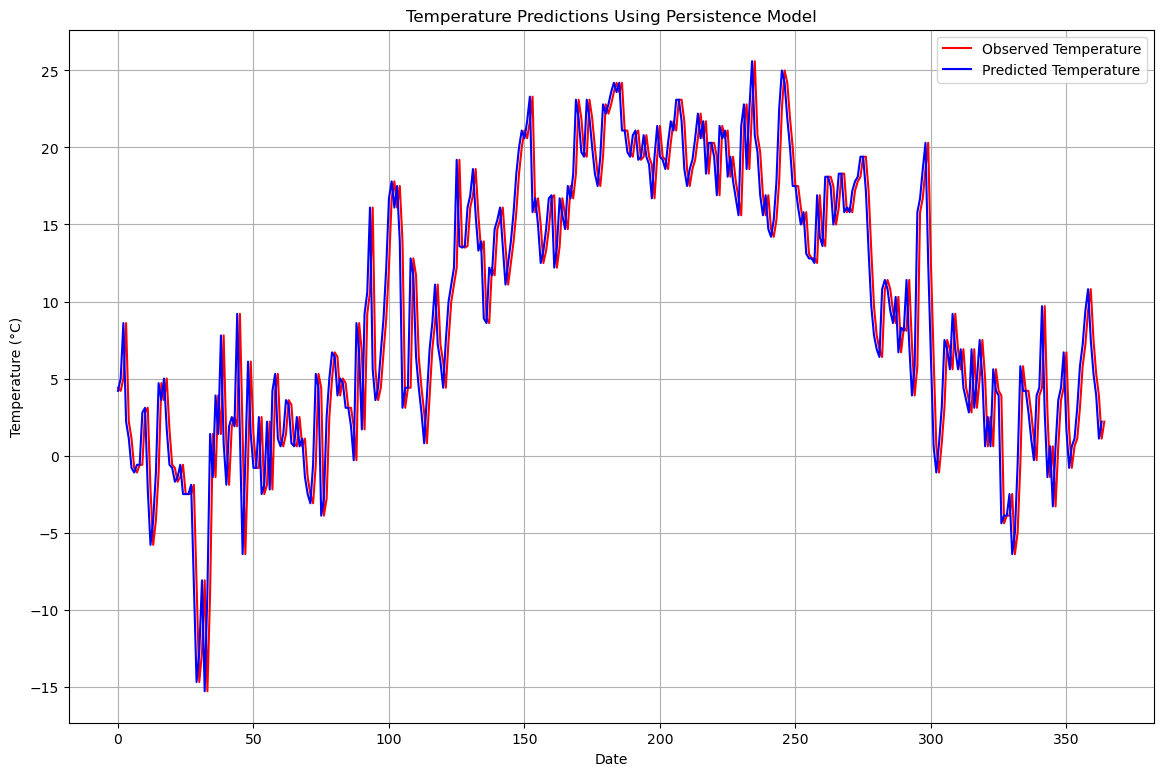

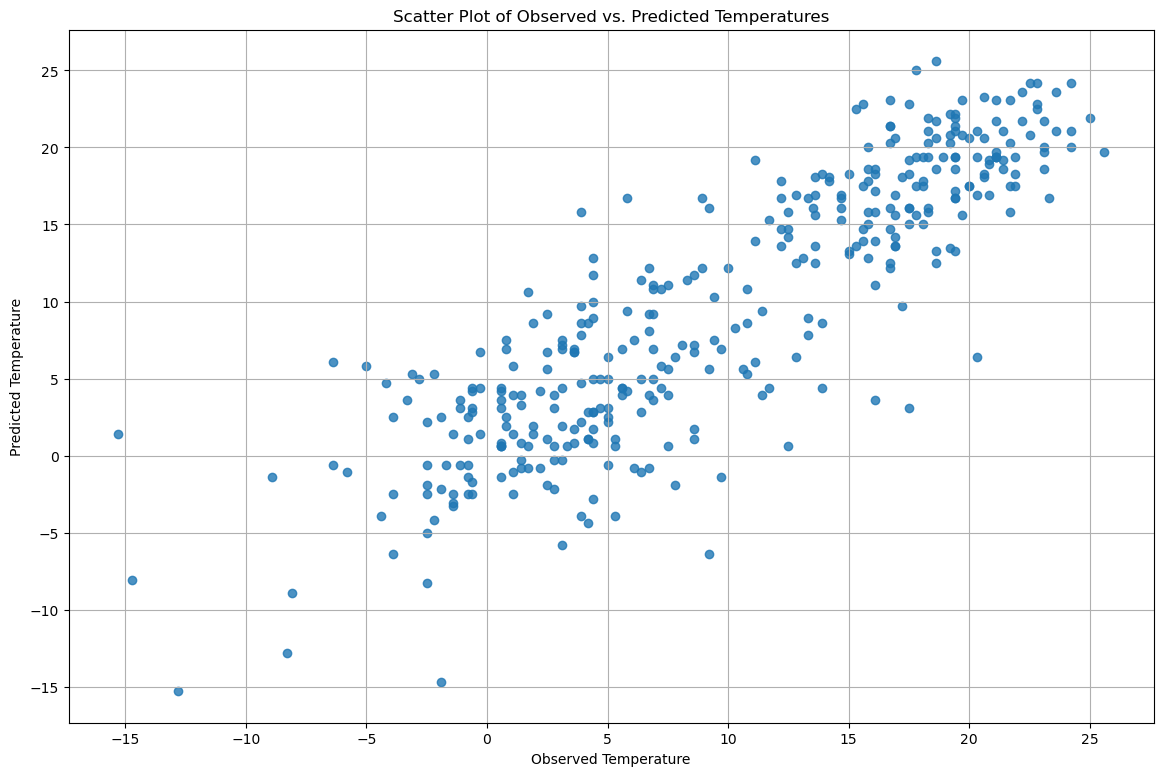

In [161]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# load the dataset
dt = pd.read_csv('Ann-Arbor-Temp.csv')
# display the first few rows of the dt
print(dt.head())

temps = dt['T'].values

# predictions for next day
pred = np.roll(temps, shift = -1)
# last day has no pred
pred[-1] = np.nan

plt.figure(figsize = (14, 9))

# plot for pred
plt.plot(dt.index, temps, label = 'Observed Temperature', color = 'r', 
         linestyle = '-')
plt.plot(dt.index, pred, label='Predicted Temperature', color='b', 
         linestyle='-')
plt.title('Temperature Predictions Using Persistence Model')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.show()

           
# Scatter plot
plt.figure(figsize=(14, 9))
plt.scatter(temps[:-1], pred[1:], alpha=0.8)
plt.xlabel('Observed Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Scatter Plot of Observed vs. Predicted Temperatures')
plt.grid(True)
plt.show()

In [120]:
## 2.2

In [162]:
# drop the last value and remove NaN values
r_temps = temps[:-1]
#r_pred = pred[1:]
r_pred = pred[:-1]
# compute metrics
mse = np.mean((r_temps - r_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(abs(r_temps - r_pred))
bias = np.mean(r_temps - r_pred)
relative_bias = bias / np.mean(r_temps)
corr_coeff = np.corrcoef(r_temps, r_pred)[0, 1]

# check for NaN vlaues in r_temps ans r_pred
print("Number of NaNs in observed temperatures:", np.isnan(r_temps).sum())
print("Number of NaNs in predicted temperatures:", np.isnan(r_pred).sum())

#remove NaN values

# Print the results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Bias: {bias}")
print(f"Relative Bias: {relative_bias}")
print(f"Correlation Coefficient: {corr_coeff}")

Number of NaNs in observed temperatures: 0
Number of NaNs in predicted temperatures: 0
MSE: 9.889615384615386
RMSE: 3.1447758878202094
MAE: 2.364285714285714
Bias: 0.006043956043956042
Relative Bias: 0.000621644532353772
Correlation Coefficient: 0.9330884725991082


In [122]:
## 2.3

In [123]:
# According to the result, I think the persistence model is neither 
# underestimating nor overestimating for the temperature. This is 
# because the 'Bias' is 0.006 which is very close to 0. And for 
# 'Relative Bias', it is also very samll ('0.062%'), which means 
# the persistence model haven't a significant tendency to overestimate or 
# underestimate the tempreture.

In [124]:
## 2.4

In [163]:
# transforming temp to categorical variables
def t_categories(temp_series, threshold=15):
    return np.where(temp_series >= threshold, 'Warm', 'Cold')

# transform
obs_categories = t_categories(temps)
# drop the last NaN value and use 'Cold' to fill up ?
pred_categories = t_categories(pred[:-1]) 

# adding the categories to the dataset
dt['Observed_Category'] = obs_categories
# use 'Cold' to fill up ?
dt['Predicted_Category'] = np.append(pred_categories, 'Cold') 

print(dt.head())

       STATION                                NAME    DATE    T  \
0  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/1/23  4.4   
1  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/2/23  4.2   
2  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/3/23  5.0   
3  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/4/23  8.6   
4  USW00094889  ANN ARBOR MUNICIPAL AIRPORT, MI US  1/5/23  2.2   

  Observed_Category Predicted_Category  
0              Cold               Cold  
1              Cold               Cold  
2              Cold               Cold  
3              Cold               Cold  
4              Cold               Cold  


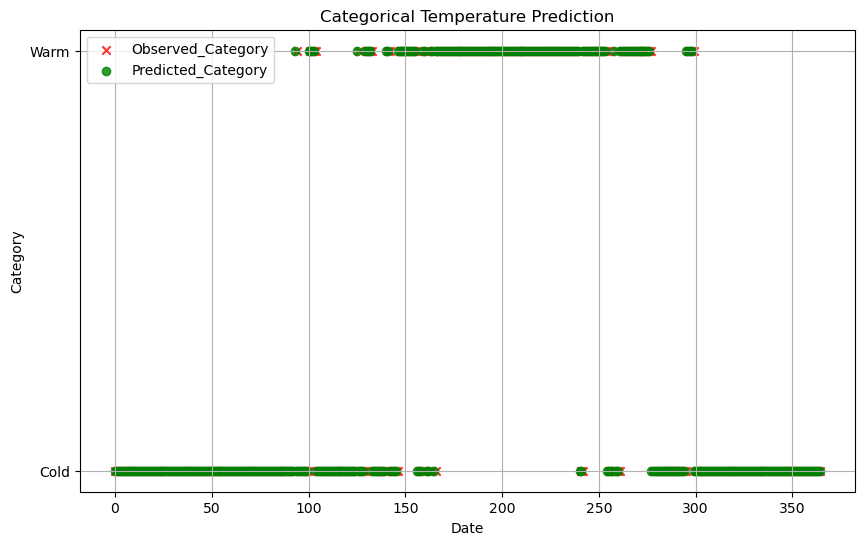

In [126]:
plt.figure(figsize = (10, 6))
# plot observed and predicted categories using scatter plot
plt.scatter(dt.index, dt['Observed_Category'], label = 'Observed_Category', 
            alpha = 0.8, color = 'r', marker = 'x')
plt.scatter(dt.index, dt['Predicted_Category'], label = 'Predicted_Category', 
            alpha = 0.8, color = 'g', marker = 'o')
plt.title('Categorical Temperature Prediction')
plt.xlabel('Date')
plt.ylabel('Category')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
## 2.5

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate the confusion matrix and accuracy
conf_matrix = confusion_matrix(dt['Observed_Category'], 
                               dt['Predicted_Category'], 
                               labels = ['Warm', 'Cold'])
accuracy = accuracy_score(dt['Observed_Category'], dt['Predicted_Category'])

# Print the confusion matrix and accuracy
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy of the persistence model: {accuracy:.2f}")


Confusion Matrix:
[[120  13]
 [ 13 219]]
Accuracy of the persistence model: 0.93


In [129]:
## 2.6

In [130]:
# I think the persistence model is a very good and useful model. However, 
# its performance depends the dataset we used. For example, in our homework, 
# we want to predicate tomorrow tempreture based on today tempreture. 
# According the result， for 2.5, accuracy of the persistence model is 0.93, 
# which means 93% of the days were correctly categorized as "Warm" or "Cold".
# For the last question, I think the ML will beat the persistence model, 
# this is because ML could learn from hug data to notice some reasons be 
# ignored such as seasonlity and get a better model.

In [131]:
# 3.
## 3.1

In [165]:
import pandas as pd

# it's a wrong way to solve this problem, 
#because the result just shows 1 or 0.
# Create the transition matrix
#t_counts = pd. crosstab (index = dt['Observed_Category'][:-1], 
                         #columns = dt['Observed_Category'][1:], 
                         #normalize = 'index')

# display the transition probability matrix
#print("Transition Probability Matrix:")
#print(t_counts)

In [166]:
dt['Observed_Category']

0      Cold
1      Cold
2      Cold
3      Cold
4      Cold
       ... 
360    Cold
361    Cold
362    Cold
363    Cold
364    Cold
Name: Observed_Category, Length: 365, dtype: object

In [167]:
# there are two ways to get probability matrix.
# Create a transition DataFrame
transitions = pd.DataFrame(0, index = dt['Observed_Category'].unique(), 
                           columns = dt['Observed_Category'].unique())

# Fill in the transition counts
for (i, j) in zip(dt['Observed_Category'][:-1], dt['Observed_Category'][1:]):
    transitions.loc[i, j] += 1
    
#transition_counts = pd. crosstab (index = dt['Observed_Category'][:-1], 
                        # columns = dt['Observed_Category'][1:], 
                         #normalize = 'index')

# Convert counts to probabilities
transition_probabilities = transitions.div(transitions.sum(axis=1), axis=0)

# display the transition probability matrix
print("Transition Probability Matrix:")
print(transition_probabilities)

Transition Probability Matrix:
          Cold      Warm
Cold  0.943723  0.056277
Warm  0.097744  0.902256


In [168]:
x = dt['Observed_Category'].values
n_warm_warm = np.sum((x[:-1]=='Warm') & (x[1:]=='Warm'))
n_warm_cold = np.sum((x[:-1]=='Warm') & (x[1:]=='Cold'))
n_cold_cold = np.sum((x[:-1]=='Cold') & (x[1:]=='Cold'))
n_cold_warm = np.sum((x[:-1]=='Cold') & (x[1:]=='Warm'))

# Convert counts to probabilities
#transition_probabilities = transitions.div(n_warm_warm, n_warm_cold, 
# n_cold_cold, n_cold_warm)

# display the transition probability matrix
print("Transition Probability Matrix:")
print(transition_probabilities)

Transition Probability Matrix:
          Cold      Warm
Cold  0.943723  0.056277
Warm  0.097744  0.902256


In [136]:
np.sum((x[:-1]=='Warm') & (x[1:]=='Cold'))

13

In [137]:
np.sum((x[:-1]=='Cold') & (x[1:]=='Cold'))

218

In [138]:
np.sum((x[:-1]=='Cold') & (x[1:]=='Warm'))

13

In [139]:
## 3.2

In [169]:
def markov_chain(initial_state, n, P):

   # define state
    states = ['Cold', 'Warm']
   # create sate and map them to indices
    state_index =  {state: idx for idx, state in enumerate(states)}

   # get the initial state to its index
    current_state_idx = state_index[initial_state]

   # initialize the sequence with the initial state
    sequence = [states[current_state_idx]]

   # get the sequence
    for _ in range(n - 1):
        # Get the transition probabilities for the current state
        transition_probs = P[current_state_idx]
        
        # Choose the next state based on the transition probabilities
        next_state_idx = np.random.choice([0, 1], p = transition_probs)
        # choose the next state based on current state
        #next_state_idx = np.random.choice([0, 1], p = P[current_state_idx])

        # append the next state to the sequence
        sequence.append(states[next_state_idx])

       # update the current state index
        current_state_idx = next_state_idx

    return sequence

In [170]:
# get transition_probs from 3.1
transition_probs = np.array([
    [0.943723, 0.056277],
    [0.097744, 0.902256]
])
# Generate five simulation sequences of length 30 starting from the initial 
# state 'Cold'
sim_1 = markov_chain('Cold', 30, transition_probs)
sim_2 = markov_chain('Cold', 30, transition_probs)
sim_3 = markov_chain('Cold', 30, transition_probs)
sim_4 = markov_chain('Cold', 30, transition_probs)
sim_5 = markov_chain('Cold', 30, transition_probs)

# create dataframe to show
df = pd.DataFrame({'sim_1': sim_1, 'sim_2': sim_2, 'sim_3': sim_3, 'sim_4': sim_4, 'sim_5': sim_5})

In [142]:
df

,sim_1,sim_2,sim_3,sim_4,sim_5
0,Cold,Cold,Cold,Cold,Cold
1,Cold,Cold,Cold,Cold,Cold
2,Cold,Cold,Cold,Cold,Cold
3,Cold,Cold,Cold,Cold,Warm
4,Cold,Cold,Cold,Cold,Warm
5,Cold,Cold,Cold,Cold,Warm
6,Cold,Cold,Cold,Cold,Warm
7,Cold,Cold,Cold,Cold,Warm
8,Warm,Cold,Cold,Cold,Warm
9,Warm,Cold,Cold,Cold,Warm


In [143]:
# As the result, we could observe all simulations are not similar to one 
# another. Also, they are identical to observations. For reason, I think 
# this is because the randomness of the Markov Chain will lead to different 
# simulation sequences, even if the same transition probability matrix is 
# used, different results will be obtained.

In [144]:
## 3.3

In [173]:
# divide the date
march_to_august = dt.loc['3/1/23':'8/31/23', 'Observed_Category']
august_to_december = dt.loc['8/1/23':'12/31/23', 'Observed_Category']

# get two time quantum transition matrix
transition_matrix_march_to_august = compute_transition_matrix(march_to_august)
transition_matrix_august_to_december = compute_transition_matrix(august_to_december)

# print
print("Transition Matrix (March to August):")
print(transition_matrix_march_to_august)
print("\nTransition Matrix (August to December):")
print(transition_matrix_august_to_december)

Transition Matrix (March to August):
          Cold      Warm
Cold  0.891566  0.108434
Warm  0.090000  0.910000

Transition Matrix (August to December):
          Cold      Warm
Cold  0.955556  0.044444
Warm  0.080645  0.919355


In [180]:
# According to the result, we could observe the transition matrix of Aug to 
# Dec('Cold' to 'Cold') is higher and ('Cold'
# to 'Warm') is lower than Mar to Aug, I think maybe this is because the 
# season change and the sample is not enough. 

In [181]:
# 4.
# 4.1
# I think this question has different answer based on different outliers. 
# 1. If the more the outlier deviates from the mean， the mean is less 
# robust than other.
# 2. If the outlier impact the distribution on both sides of the 
# median, the median will be significanty impacted.
# 3. The outlier change the number of mode, the mode will be 
# significantly impacted.

In [182]:
# 4.2
# Both can be influenced by outlier in the data. Because they measure 
# systematic error and a few extreme value or outliers can distort 
# the estimation process.

In [183]:
# 4.3
# Mean Absolute Error (MAE) is more robust to outliers compared to 
# Root Mean Squared Error (RMSE).  This is because MAE treats all 
# errors equally without amplifying the impact of large deviations, 
# while RMSE disproportionately penalizes larger errors due to squaring.

In [75]:
# Extra Credit

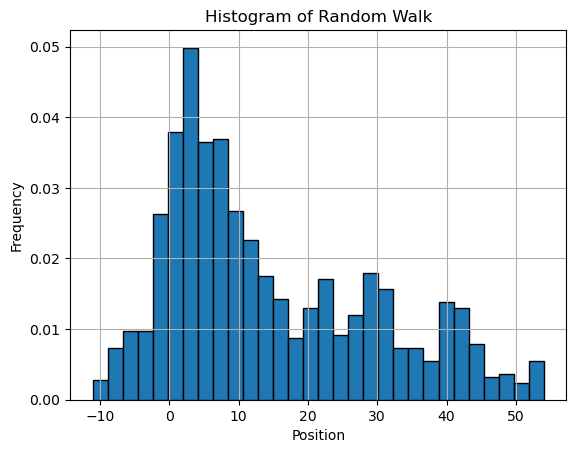

In [179]:
def random_walk(n):
    # initialize the first loction
    cur_loc = 0
    # Array to store the positions
    positions = np.zeros(n)
    
    # Generate steps: +1 or -1 with equal probability
    steps = np.random.choice([-1, 1], size = n)
    
    # Perform the random walk
    for i in range(n):
        cur_loc += steps[i]
        positions[i] = cur_loc
    
    return positions

# Generate a sequence of 1,000 values
n = 1000
walk_sequence = random_walk(n)

# Plot the histogram of the data
plt.hist(walk_sequence, bins= 30, edgecolor='black', density=True)
plt.title('Histogram of Random Walk')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [184]:
# Properties of Distribution
# 1. When I try to run this model more times, I could know the distribution 
# is symmetric around 0 because the random walk has equal probabilities of 
# moving +1 or -1 at each step.
# 2. As the more steps, the distribution of histogram will close to normal 
# distribution.
# 3. Most of it is still concentrated near zero, with no significant 
# deviation.